# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras

# Function for calcualting the accuracy of the classification

In [2]:
def acc(output,label):
    test=((output[:,0]-label)==0)*1.0
    return sum(test)/len(test)*100

# Network inputs

Loading data (Digits)

In [3]:
ix=28*28 # Number of features
epochs=20
digits=[0,1] # Digits to classify

# Loading data
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Adaline function

In [4]:
a = 0.0001

def sigmoid(x):
    return 1/(1+np.exp(-a*x))

In [17]:
def train_adaline(train_set, train_lbl_set, epochs=20, ix=28*28):
    w=np.random.rand(ix+1,1) # Weights initialization
    print('\nTraining:\n')

    r=random.sample(range(len(train_set)), len(train_set))
    train_set=train_set[r]
    train_lbl_set=train_lbl_set[r]

    for epoch in range(epochs):
        loss=0
        for i in range(len(train_set)):

            net_input=np.einsum('i,ij->j',train_set[i],w)

            y_pred=sigmoid(net_input) # Activation function
            error = train_lbl_set[i] - y_pred # Error calculation

            # Update weights
            w += train_set[i].reshape(train_set[i].shape[0],1) * error * y_pred * (1 - y_pred)

            loss+=abs(error)
            
        # Training set accuracy
        logits=np.einsum('ij,jk->ik',train_set,w)
        logits=(logits>0)*2.0-1.0
        print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,train_lbl_set)))

    
    return w

In [6]:
# Training

indices=np.append(np.where(train_labels==digits[0]),np.where(train_labels==digits[1]))
train=train_images[indices]
train=1/255*2*train.reshape(len(train),28*28)-1

# Additional column is added to the training set instead of calculating biases
train=np.concatenate((train,np.ones([len(train),1])),axis=1)
train_lbl=train_labels[indices]
train_lbl=(train_lbl==digits[1])*2.0-1.0

print('Number of training images : ', train.shape[0])

Number of training images :  12665


In [7]:
w_adaline = train_adaline(train, train_lbl, epochs=20, ix=28*28)


Training:

Epoch: 0, error: 8030.37 accuracy: 99.54
Epoch: 1, error: 6855.90 accuracy: 99.57
Epoch: 2, error: 6634.64 accuracy: 99.60
Epoch: 3, error: 6521.56 accuracy: 99.61
Epoch: 4, error: 6449.48 accuracy: 99.61
Epoch: 5, error: 6398.26 accuracy: 99.62
Epoch: 6, error: 6359.38 accuracy: 99.64
Epoch: 7, error: 6328.55 accuracy: 99.64
Epoch: 8, error: 6303.30 accuracy: 99.64
Epoch: 9, error: 6282.11 accuracy: 99.65
Epoch: 10, error: 6264.01 accuracy: 99.65
Epoch: 11, error: 6248.30 accuracy: 99.66
Epoch: 12, error: 6234.50 accuracy: 99.67
Epoch: 13, error: 6222.25 accuracy: 99.68
Epoch: 14, error: 6211.28 accuracy: 99.68
Epoch: 15, error: 6201.39 accuracy: 99.68
Epoch: 16, error: 6192.40 accuracy: 99.69
Epoch: 17, error: 6184.19 accuracy: 99.70
Epoch: 18, error: 6176.65 accuracy: 99.71
Epoch: 19, error: 6169.71 accuracy: 99.71


In [8]:
# Test

# Select test images of 0 and 1
indices=np.append(np.where(test_labels==digits[0]),np.where(test_labels==digits[1]))
test=test_images[indices]

test_lbl=test_labels[indices]
test_lbl=(test_lbl==digits[1])*2.0-1.0

# Generate shift range
shift_range = range(0, 28, 3)
# Iterate through shift range
test_subset_shifts = np.empty((len(shift_range),len(test), 28, 28))

for i, shift in enumerate(shift_range):
    
    # Apply shift to test images and save them in test_subset_shifts
    test_shift = np.roll(test, shift, axis=1)
    test_subset_shifts[i] = test_shift


test_subset_shifts=1/255*2*test_subset_shifts.reshape(len(shift_range), len(test),28*28)-1

# Additional column is added to the test set instead of calculating biases
test_subset_shifts=np.concatenate((test_subset_shifts,np.ones([len(shift_range), len(test),1])),axis=2)
test=1/255*2*test.reshape(len(test),28*28)-1
test=np.concatenate((test,np.ones([len(test),1])),axis=1)

print("The structure with all the shifted images is of shape : ", test_subset_shifts.shape)

The structure with all the shifted images is of shape :  (10, 2115, 785)


The sanity sheck is :  True


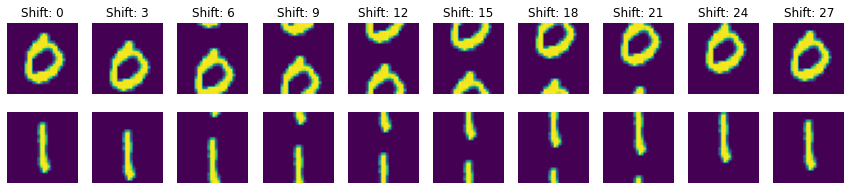

In [9]:
# Plot two images for each shift

images_to_plot = (0,1000)

fig, ax = plt.subplots(2, 10, figsize=(15, 3))

for i, shift in enumerate(shift_range):
    ax[0, i].imshow(test_subset_shifts[i, images_to_plot[0], :-1].reshape(28, 28), cmap='viridis')
    ax[0, i].set_title('Shift: {}'.format(shift))
    ax[0, i].axis('off')
    ax[1, i].imshow(test_subset_shifts[i, images_to_plot[1], :-1].reshape(28, 28), cmap='viridis')
    ax[1, i].axis('off')

print("The sanity sheck is : ", (test == test_subset_shifts[0]).all())

Test accuracy for shift 0 pixels: 99.86
Test accuracy for shift 3 pixels: 99.10
Test accuracy for shift 6 pixels: 64.02
Test accuracy for shift 9 pixels: 41.47
Test accuracy for shift 12 pixels: 53.19
Test accuracy for shift 15 pixels: 80.76
Test accuracy for shift 18 pixels: 38.16
Test accuracy for shift 21 pixels: 46.00
Test accuracy for shift 24 pixels: 93.00
Test accuracy for shift 27 pixels: 99.86


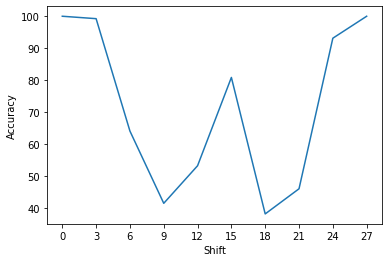

In [10]:
# Test set accuracy for all the shifted images and plot them in a lineplot

accuracy = []

for i, shift in enumerate(shift_range):
    logits=np.einsum('ij,jk->ik',test_subset_shifts[i],w_adaline)
    logits=(logits>0)*2.0-1.0
    accuracy.append(acc(logits,test_lbl))
    print('Test accuracy for shift {:} pixels: {:0.2f}'.format(shift,accuracy[i]))

plt.plot(shift_range, accuracy)
plt.xlabel('Shift')
plt.ylabel('Accuracy')
plt.xticks(shift_range)
plt.show()

In [18]:
# Iterate through shift range and create new train set with shifted images and original images

w_adaline_shifts = np.empty((len(shift_range), 28*28+1, 1))

for i, shift in enumerate(shift_range):

    train_shift = np.roll(train, shift, axis=1)
    train_original_and_shifted = np.concatenate((train_shift, train.reshape(len(train), 28*28+1)), axis=0)
    train_lbl_original_and_shifted = np.concatenate((train_lbl, train_lbl), axis=0)

    print("For a shift of ", shift , " the shape of the new train set is : ", train_original_and_shifted.shape)

    w_adaline_shifts[i] = train_adaline(train_original_and_shifted, train_lbl_original_and_shifted, epochs=20, ix=28*28)

For a shift of  0  the shape of the new train set is :  (25330, 785)
For a shift of  3  the shape of the new train set is :  (25330, 785)
For a shift of  6  the shape of the new train set is :  (25330, 785)
For a shift of  9  the shape of the new train set is :  (25330, 785)
For a shift of  12  the shape of the new train set is :  (25330, 785)
For a shift of  15  the shape of the new train set is :  (25330, 785)
For a shift of  18  the shape of the new train set is :  (25330, 785)
For a shift of  21  the shape of the new train set is :  (25330, 785)
For a shift of  24  the shape of the new train set is :  (25330, 785)
For a shift of  27  the shape of the new train set is :  (25330, 785)


Test accuracy for a trained shift 0 pixels is for a test shift of 0 pixels : 99.91
Test accuracy for a trained shift 3 pixels is for a test shift of 3 pixels : 98.87
Test accuracy for a trained shift 6 pixels is for a test shift of 6 pixels : 54.14
Test accuracy for a trained shift 9 pixels is for a test shift of 9 pixels : 39.24
Test accuracy for a trained shift 12 pixels is for a test shift of 12 pixels : 54.56
Test accuracy for a trained shift 15 pixels is for a test shift of 15 pixels : 53.71
Test accuracy for a trained shift 18 pixels is for a test shift of 18 pixels : 37.68
Test accuracy for a trained shift 21 pixels is for a test shift of 21 pixels : 53.66
Test accuracy for a trained shift 24 pixels is for a test shift of 24 pixels : 96.60
Test accuracy for a trained shift 27 pixels is for a test shift of 27 pixels : 99.91


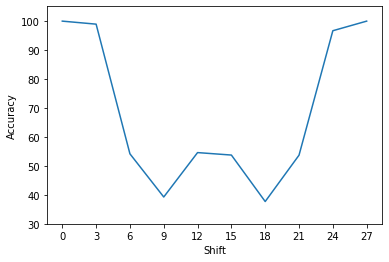

In [16]:
# Plot the test accuracy of the network vs. shifting value

accuracy_list = []

for i, shift_test in enumerate(shift_range):
    logits=np.einsum('ij,jk->ik',test_subset_shifts[i],w_adaline_shifts[i])
    logits=(logits>0)*2.0-1.0
    accuracy_list.append(acc(logits, test_lbl))
    print('Test accuracy for a trained shift {:} pixels is for a test shift of {:} pixels : {:0.2f}'.format(shift_test, shift_test, accuracy_list[i]))

plt.plot(shift_range, accuracy_list)
plt.xlabel('Shift')
plt.ylabel('Accuracy')
plt.xticks(shift_range)
plt.ylim([30, 105])
plt.show()
